In [4]:
import geopandas as gpd
from geodatasets import get_path
import matplotlib as plt

In [5]:
path_to_data = get_path("nybb")
gdf = gpd.read_file(path_to_data)

In [6]:
gdf.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,centroid,distance,boundary,buffered,buffered_centroid
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",POINT (941639.45 150931.991),0.000000,"MULTILINESTRING ((970217.022 145643.332, 97022...","POLYGON ((903234.894 123347.784, 903178.057 12...","POLYGON ((951639.45 150931.991, 951591.298 149..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",POINT (1034578.078 197116.604),103781.535276,"MULTILINESTRING ((1029606.077 156073.814, 1029...","POLYGON ((1066963.473 157602.686, 1067059.264 ...","POLYGON ((1044578.078 197116.604, 1044529.926 ..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",POINT (998769.115 174169.761),61674.893421,"MULTILINESTRING ((1021176.479 151374.797, 1021...","POLYGON ((962679.12 165570.385, 962651.33 1658...","POLYGON ((1008769.115 174169.761, 1008720.962 ..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",POINT (993336.965 222451.437),88247.742789,"MULTILINESTRING ((981219.056 188655.316, 98094...","POLYGON ((980499.119 178448.735, 979864.868 17...","POLYGON ((1003336.965 222451.437, 1003288.812 ..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",POINT (1021174.79 249937.98),126996.283623,"MULTILINESTRING ((1012821.806 229228.265, 1012...","POLYGON ((992724.911 240962.362, 992700.941 24...","POLYGON ((1031174.79 249937.98, 1031126.637 24..."


In [7]:
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,centroid,distance,boundary,buffered,buffered_centroid
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",POINT (941639.45 150931.991),0.000000,"MULTILINESTRING ((970217.022 145643.332, 97022...","POLYGON ((903234.894 123347.784, 903178.057 12...","POLYGON ((951639.45 150931.991, 951591.298 149..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",POINT (1034578.078 197116.604),103781.535276,"MULTILINESTRING ((1029606.077 156073.814, 1029...","POLYGON ((1066963.473 157602.686, 1067059.264 ...","POLYGON ((1044578.078 197116.604, 1044529.926 ..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",POINT (998769.115 174169.761),61674.893421,"MULTILINESTRING ((1021176.479 151374.797, 1021...","POLYGON ((962679.12 165570.385, 962651.33 1658...","POLYGON ((1008769.115 174169.761, 1008720.962 ..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",POINT (993336.965 222451.437),88247.742789,"MULTILINESTRING ((981219.056 188655.316, 98094...","POLYGON ((980499.119 178448.735, 979864.868 17...","POLYGON ((1003336.965 222451.437, 1003288.812 ..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",POINT (1021174.79 249937.98),126996.283623,"MULTILINESTRING ((1012821.806 229228.265, 1012...","POLYGON ((992724.911 240962.362, 992700.941 24...","POLYGON ((1031174.79 249937.98, 1031126.637 24..."


In [9]:
gdf["centroid"] = gdf.centroid
gdf["centroid"]

0      POINT (941639.45 150931.991)
1    POINT (1034578.078 197116.604)
2     POINT (998769.115 174169.761)
3     POINT (993336.965 222451.437)
4      POINT (1021174.79 249937.98)
Name: centroid, dtype: geometry

In [10]:
first_point = gdf["centroid"].iloc[0]
gdf["distance"] = gdf["centroid"].distance(first_point)
gdf["distance"]

0         0.000000
1    103781.535276
2     61674.893421
3     88247.742789
4    126996.283623
Name: distance, dtype: float64

In [11]:
gdf["distance"].mean()

76140.09102166798

<Axes: >

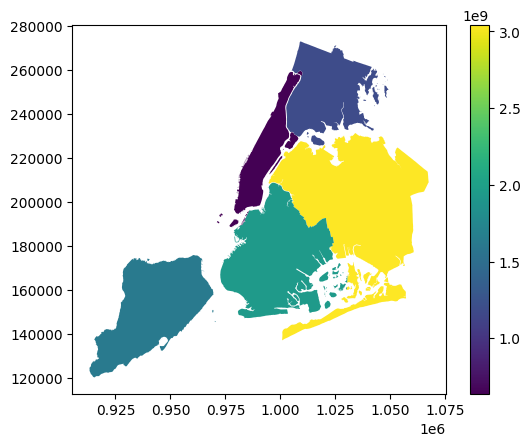

In [12]:
gdf.plot("Shape_Area" , legend = True)

<Axes: >

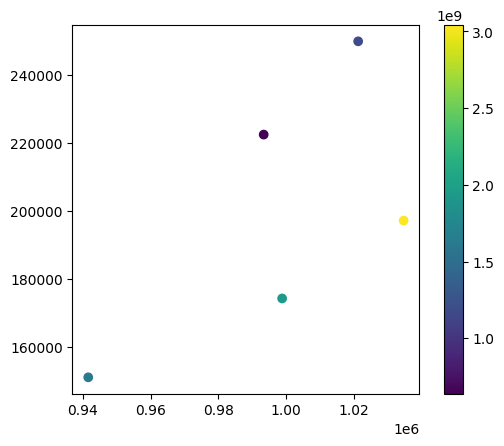

In [13]:
gdf = gdf.set_geometry("centroid")
gdf.plot("Shape_Area", legend= True)

<Axes: >

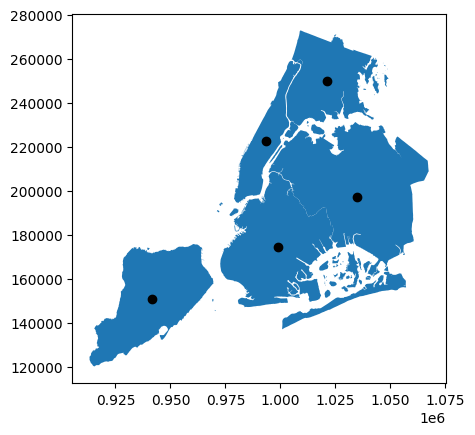

In [14]:
ax = gdf["geometry"].plot()
gdf["centroid"].plot(ax = ax, color="black")

In [16]:
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,centroid,distance
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",POINT (941639.45 150931.991),0.000000
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",POINT (1034578.078 197116.604),103781.535276
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",POINT (998769.115 174169.761),61674.893421
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",POINT (993336.965 222451.437),88247.742789
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",POINT (1021174.79 249937.98),126996.283623


In [21]:
gdf["boundary"] = gdf.boundary

In [26]:
gdf["boundary"]

0    GEOMETRYCOLLECTION EMPTY
1    GEOMETRYCOLLECTION EMPTY
2    GEOMETRYCOLLECTION EMPTY
3    GEOMETRYCOLLECTION EMPTY
4    GEOMETRYCOLLECTION EMPTY
Name: boundary, dtype: geometry

In [27]:
print(gdf.geometry.head())
print(gdf.geometry.geom_type.unique())
print(gdf.is_valid.all())
print(gdf.is_empty.sum())

0      POINT (941639.45 150931.991)
1    POINT (1034578.078 197116.604)
2     POINT (998769.115 174169.761)
3     POINT (993336.965 222451.437)
4      POINT (1021174.79 249937.98)
Name: centroid, dtype: geometry
['Point']
True
0


In [ ]:
gdf["centroid"] = gdf.centroid
gdf["boundary"] = gdf.boundary
gdf = gdf.set_geometry("geometry")


In [33]:
gdf["boundary"] = gdf.boundary
gdf["boundary"]

0    MULTILINESTRING ((970217.022 145643.332, 97022...
1    MULTILINESTRING ((1029606.077 156073.814, 1029...
2    MULTILINESTRING ((1021176.479 151374.797, 1021...
3    MULTILINESTRING ((981219.056 188655.316, 98094...
4    MULTILINESTRING ((1012821.806 229228.265, 1012...
Name: boundary, dtype: geometry

In [34]:
gdf["buffered"] = gdf.buffer(10000)
gdf["buffered_centroid"] = gdf["centroid"].buffer(10000)



<Axes: >

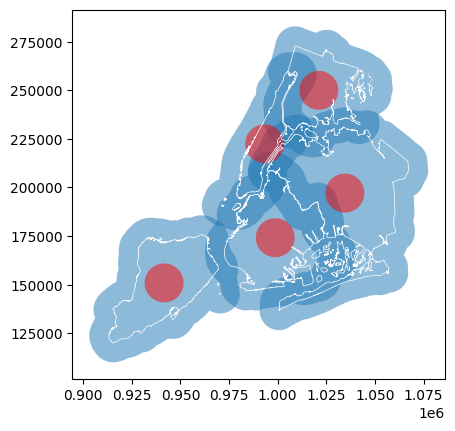

In [47]:
ax = gdf["buffered"].plot(alpha=0.5)
gdf["buffered_centroid"].plot(ax=ax, color="red", alpha=0.5)
gdf["boundary"].plot(ax=ax, color="white", linewidth=0.5)



In [48]:
gdf.tail()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,centroid,distance,boundary,buffered,buffered_centroid
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",POINT (941639.45 150931.991),0.000000,"MULTILINESTRING ((970217.022 145643.332, 97022...","POLYGON ((903234.894 123347.784, 903178.057 12...","POLYGON ((951639.45 150931.991, 951591.298 149..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",POINT (1034578.078 197116.604),103781.535276,"MULTILINESTRING ((1029606.077 156073.814, 1029...","POLYGON ((1066963.473 157602.686, 1067059.264 ...","POLYGON ((1044578.078 197116.604, 1044529.926 ..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",POINT (998769.115 174169.761),61674.893421,"MULTILINESTRING ((1021176.479 151374.797, 1021...","POLYGON ((962679.12 165570.385, 962651.33 1658...","POLYGON ((1008769.115 174169.761, 1008720.962 ..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",POINT (993336.965 222451.437),88247.742789,"MULTILINESTRING ((981219.056 188655.316, 98094...","POLYGON ((980499.119 178448.735, 979864.868 17...","POLYGON ((1003336.965 222451.437, 1003288.812 ..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",POINT (1021174.79 249937.98),126996.283623,"MULTILINESTRING ((1012821.806 229228.265, 1012...","POLYGON ((992724.911 240962.362, 992700.941 24...","POLYGON ((1031174.79 249937.98, 1031126.637 24..."
